In [1]:
import os
import numpy as np
import pandas as pd

from unidecode import unidecode

import tensorflow as tf
from tensorflow import keras

import pickle # saving and loading trained model
from os import path

# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# importing library for plotting
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import metrics
from sklearn.metrics import accuracy_score # for calculating accuracy of model
from sklearn.model_selection import train_test_split # for splitting the dataset for training and testing
from sklearn.metrics import classification_report # for generating a classification report of model

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

from keras.layers import Dropout, Activation, Flatten, Convolution1D, Dropout, Reshape
from keras.layers import Dense # importing dense layer
from keras.models import Sequential #importing Sequential layer

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [3]:
#Define learning rate
lr=0.001 

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    print(gpu, "\n")
else:
  print("No GPU device found")

PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU') 



In [5]:
!nvidia-smi

Sun Dec 22 14:41:46 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 566.36                 Driver Version: 566.36         CUDA Version: 12.7     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 Ti   WDDM  |   00000000:01:00.0  On |                  N/A |
| 44%   55C    P8             19W /  200W |     830MiB /   8192MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [6]:
import pandas as pd
import glob

path = r'H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, encoding='cp1252', index_col=None, header=0, low_memory=False)
    li.append(df)
    print("Read Completed for ", filename)
    
# path = r'H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Test' # use your path
# all_files = glob.glob(path + "/*.csv")

# for filename in all_files:
#     df = pd.read_csv(filename, encoding='cp1252', index_col=None, header=0, low_memory=False)
#     li.append(df)
#     print("Read Completed for ", filename)
    
print("Reading Finished")
df = pd.concat(li, axis=0, ignore_index=True)

#df = df.rename(columns={' Label': 'Label'})

Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\ARP_Spoofing.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\Benign.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\MQTT-DDoS-Connect_Flood.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\MQTT-DDoS-Publish_Flood.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\MQTT-DoS-Connect_Flood.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\MQTT-DoS-Publish_Flood.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\MQTT-Malformed_Data.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\Recon-OS_Scan.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\Recon-Ping_Sweep.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\Recon-Port_Scan.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\Recon-VulScan.csv
Read Completed for  H:/Datasets/CIC_IoMT_2024/WiFi_MQTT/Train\TCP_IP-DDoS-ICMP1

In [7]:
df.describe()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Data
count,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,7024968.0,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,...,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,7.024968e+06,377211.000000
mean,2.479750e+04,8.069253e+00,6.472956e+01,1.552103e+04,1.552103e+04,0.0,5.166155e-03,1.578183e-01,3.540993e-02,1.808412e-02,...,5.363634e+00,5.861280e+01,8.468291e+07,9.499088e+00,1.034548e+01,7.575086e+00,2.199700e+03,8.252674e-02,1.415274e+02,67763.850601
std,2.466290e+05,6.341884e+00,7.772106e+00,3.983036e+04,3.983036e+04,0.0,3.441049e-02,3.377554e-01,1.254740e-01,8.506440e-02,...,3.576236e+01,7.754816e+01,1.444475e+07,6.822923e-01,2.811087e+00,5.055470e+01,1.919075e+04,2.177283e-01,1.755395e+01,49627.942322
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.200000e+01,-1.282061e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000
25%,1.600000e+00,1.050000e+00,6.400000e+01,6.772248e+00,6.772248e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,4.224000e+01,8.467927e+07,9.500000e+00,9.171918e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,20383.000000
50%,1.080000e+02,6.000000e+00,6.400000e+01,1.505536e+02,1.505536e+02,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.000000e+01,8.469641e+07,9.500000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,62407.000000
75%,1.902050e+04,1.700000e+01,6.400000e+01,1.932537e+04,1.932537e+04,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,5.400000e+01,8.469686e+07,9.500000e+00,1.039230e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.415500e+02,109558.000000
max,9.884427e+06,1.700000e+01,2.550000e+02,2.097152e+06,2.097152e+06,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,7.172964e+02,1.514000e+03,1.694694e+08,1.500000e+01,5.502727e+01,1.014268e+03,5.144202e+05,1.000000e+00,2.446000e+02,173036.000000


In [8]:
df.head()

,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,...,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,Label,Data
0,866.6,10.4,64.0,45722.390222,45722.390222,0.0,0.0,0.0,0.0,0.3,...,431.8,1.694026e+08,5.5,16.963645,213.095221,66236.076476,0.9,38.5,ARP_Spoofing,NaN
1,3934.3,12.6,131.2,35708.799475,35708.799475,0.0,0.0,0.0,0.0,0.3,...,406.3,1.694026e+08,13.5,30.885371,708.919620,251721.126817,1.0,244.6,ARP_Spoofing,NaN
2,5592.8,12.6,97.6,66.403506,66.403506,0.0,0.0,0.0,0.0,0.3,...,386.6,1.361110e-02,5.5,21.787095,290.694475,84028.647525,0.9,38.5,ARP_Spoofing,NaN
3,9303.6,14.8,80.8,51.201280,51.201280,0.0,0.0,0.0,0.0,0.1,...,300.2,1.694026e+08,13.5,26.954506,597.046005,178453.001691,1.0,244.6,ARP_Spoofing,NaN
4,8592.4,12.6,98.6,42.706455,42.706455,0.0,0.0,0.0,0.0,0.2,...,209.2,1.393099e-02,5.5,24.255148,375.324132,80115.110731,0.9,38.5,ARP_Spoofing,NaN


In [9]:
df.columns

Index(['Header_Length', 'Protocol Type', 'Duration', 'Rate', 'Srate', 'Drate',
       'fin_flag_number', 'syn_flag_number', 'rst_flag_number',
       'psh_flag_number', 'ack_flag_number', 'ece_flag_number',
       'cwr_flag_number', 'ack_count', 'syn_count', 'fin_count', 'rst_count',
       'HTTP', 'HTTPS', 'DNS', 'Telnet', 'SMTP', 'SSH', 'IRC', 'TCP', 'UDP',
       'DHCP', 'ARP', 'ICMP', 'IGMP', 'IPv', 'LLC', 'Tot sum', 'Min', 'Max',
       'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'Label', 'Data'],
      dtype='object')

In [10]:
df = df.drop(columns=['Data'])

In [11]:
import re

# Function to clean the labels
def clean_label(label):
    return re.sub(r'(\d+|\\d+)$', '', label)

df['Label'] = df['Label'].apply(clean_label)

# Check the cleaned labels
print(df['Label'].value_counts())

TCP_IP-DDoS-UDP            1635956
TCP_IP-DDoS-ICMP           1537476
TCP_IP-DDoS-TCP             804465
TCP_IP-DDoS-SYN             801962
TCP_IP-DoS-UDP              566950
TCP_IP-DoS-SYN              441903
TCP_IP-DoS-ICMP             416292
TCP_IP-DoS-TCP              380384
MQTT-DDoS-Connect_Flood     173036
Benign                      140382
MQTT-DDoS-Publish_Flood      27623
MQTT-DoS-Publish_Flood       23397
Recon-Port_Scan              21447
Recon-OS_Scan                16832
ARP_Spoofing                 16047
MQTT-DoS-Connect_Flood       12773
MQTT-Malformed_Data           5130
Recon-VulScan                 2173
Recon-Ping_Sweep               740
Name: Label, dtype: int64


In [12]:
print(df.shape)

(7024968, 46)


In [13]:
#cleaning the data, dropping duplicates, and displaying the clean label count with instances

data_clean = df.dropna().reset_index()
data_clean.drop_duplicates(keep='first', inplace = True)
data_clean['Label'].value_counts()

TCP_IP-DDoS-UDP            1635956
TCP_IP-DDoS-ICMP           1537476
TCP_IP-DDoS-TCP             804465
TCP_IP-DDoS-SYN             801962
TCP_IP-DoS-UDP              566950
TCP_IP-DoS-SYN              441903
TCP_IP-DoS-ICMP             416292
TCP_IP-DoS-TCP              380384
MQTT-DDoS-Connect_Flood     173036
Benign                      140382
MQTT-DDoS-Publish_Flood      27623
MQTT-DoS-Publish_Flood       23397
Recon-Port_Scan              21447
Recon-OS_Scan                16832
ARP_Spoofing                 16047
MQTT-DoS-Connect_Flood       12773
MQTT-Malformed_Data           5130
Recon-VulScan                 2173
Recon-Ping_Sweep               740
Name: Label, dtype: int64

In [14]:
from scipy.stats import zscore

def expand_categories(values):
    result = []
    s = values.value_counts()
    t = float(len(values))
    for v in s.index:
        result.append("{}:{}%".format(v,round(100*(s[v]/t),2)))
    return "[{}]".format(",".join(result))
        
def analyze(df):
    print()
    cols = df.columns.values
    total = float(len(df))

    print("{} rows".format(int(total)))
    for col in cols:
        uniques = df[col].unique()
        unique_count = len(uniques)
        if unique_count>100:
            print("** {}:{} ({}%)".format(col,unique_count,int(((unique_count)/total)*100)))
        else:
            print("** {}:{}".format(col,expand_categories(df[col])))
            expand_categories(df[col])

<Figure size 2000x2000 with 0 Axes>

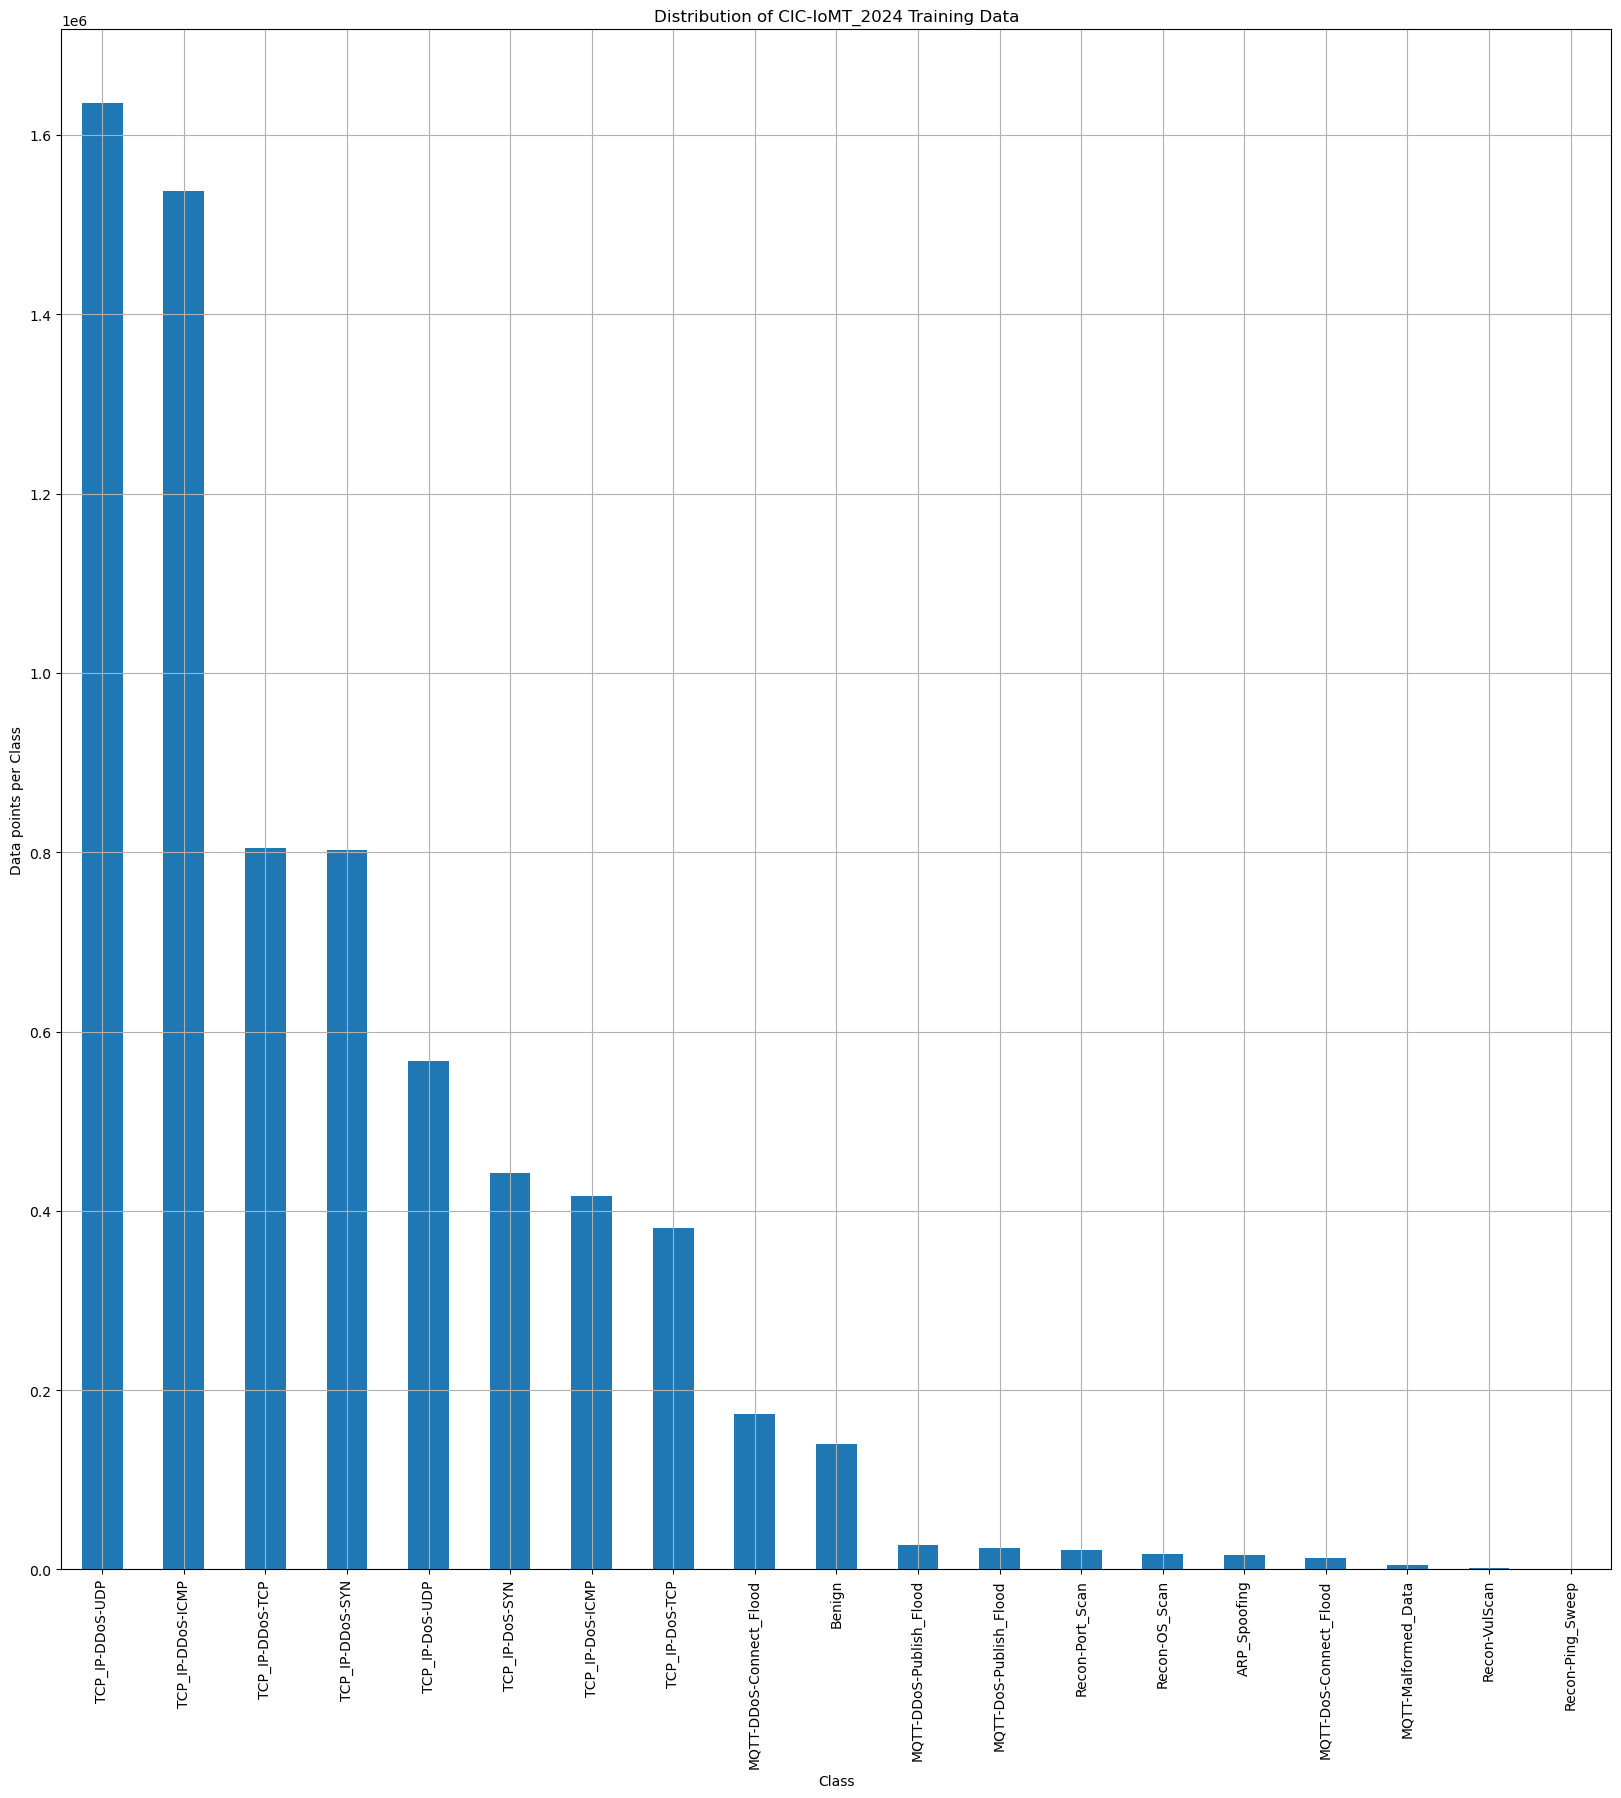

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import *

plt.figure(figsize=(20,20))

fig, ax = plt.subplots(figsize=(20,20))
class_distribution = df['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of CIC-IoMT_2024 Training Data')
plt.grid()
plt.show()

fig.savefig('CIC-IoMT_2024_Data_Distribution.pdf') 

In [16]:
# Before Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/df.shape[0]*100), 3), '%)')

Number of data points in class TCP_IP-DDoS-UDP : 1635956 ( 23.288 %)
Number of data points in class TCP_IP-DDoS-ICMP : 1537476 ( 21.886 %)
Number of data points in class TCP_IP-DDoS-TCP : 804465 ( 11.452 %)
Number of data points in class TCP_IP-DDoS-SYN : 801962 ( 11.416 %)
Number of data points in class TCP_IP-DoS-UDP : 566950 ( 8.07 %)
Number of data points in class TCP_IP-DoS-SYN : 441903 ( 6.29 %)
Number of data points in class TCP_IP-DoS-ICMP : 416292 ( 5.926 %)
Number of data points in class TCP_IP-DoS-TCP : 380384 ( 5.415 %)
Number of data points in class MQTT-DDoS-Connect_Flood : 173036 ( 2.463 %)
Number of data points in class Benign : 140382 ( 1.998 %)
Number of data points in class MQTT-DDoS-Publish_Flood : 27623 ( 0.393 %)
Number of data points in class MQTT-DoS-Publish_Flood : 23397 ( 0.333 %)
Number of data points in class Recon-Port_Scan : 21447 ( 0.305 %)
Number of data points in class Recon-OS_Scan : 16832 ( 0.24 %)
Number of data points in class ARP_Spoofing : 16047 (

In [17]:
del sorted_ds

#drop na values and reset index
data_clean = df.dropna().reset_index()

# Checkng for DUPLICATE values
data_clean.drop_duplicates(keep='first', inplace = True)

data_clean['Label'].value_counts()

print("Read {} rows.".format(len(data_clean)))

Read 7024968 rows.


In [18]:
analyze(data_clean)


7024968 rows
** index:7024968 (100%)
** Header_Length:744347 (10%)
** Protocol Type:1569 (0%)
** Duration:6939 (0%)
** Rate:4311763 (61%)
** Srate:4311763 (61%)
** Drate:[0.0:100.0%]
** fin_flag_number:229 (0%)
** syn_flag_number:539 (0%)
** rst_flag_number:507 (0%)
** psh_flag_number:387 (0%)
** ack_flag_number:628 (0%)
** ece_flag_number:[0.0:99.99%,0.01:0.0%,0.1:0.0%,0.02:0.0%,0.2:0.0%,0.0238095238095238:0.0%,0.09:0.0%,0.07:0.0%]
** cwr_flag_number:[0.0:99.99%,0.01:0.01%,0.1:0.0%,0.02:0.0%,0.0238095238095238:0.0%,0.07:0.0%]
** ack_count:570 (0%)
** syn_count:1062 (0%)
** fin_count:2845 (0%)
** rst_count:81074 (1%)
** HTTP:[0.0:99.87%,0.01:0.07%,1.0:0.02%,0.1:0.01%,0.02:0.0%,0.9:0.0%,0.4:0.0%,0.2:0.0%,0.3:0.0%,0.8:0.0%,0.5:0.0%,0.6:0.0%,0.03:0.0%,0.7:0.0%,0.04:0.0%,0.05:0.0%,0.06:0.0%,0.09:0.0%,0.07:0.0%,0.11:0.0%,0.08:0.0%,0.12:0.0%,0.13:0.0%,0.14:0.0%,0.15:0.0%,0.16:0.0%,0.0166666666666666:0.0%,0.51:0.0%,0.22:0.0%,0.21:0.0%,0.25:0.0%,0.24:0.0%,0.17:0.0%]
** HTTPS:257 (0%)
** DNS:[

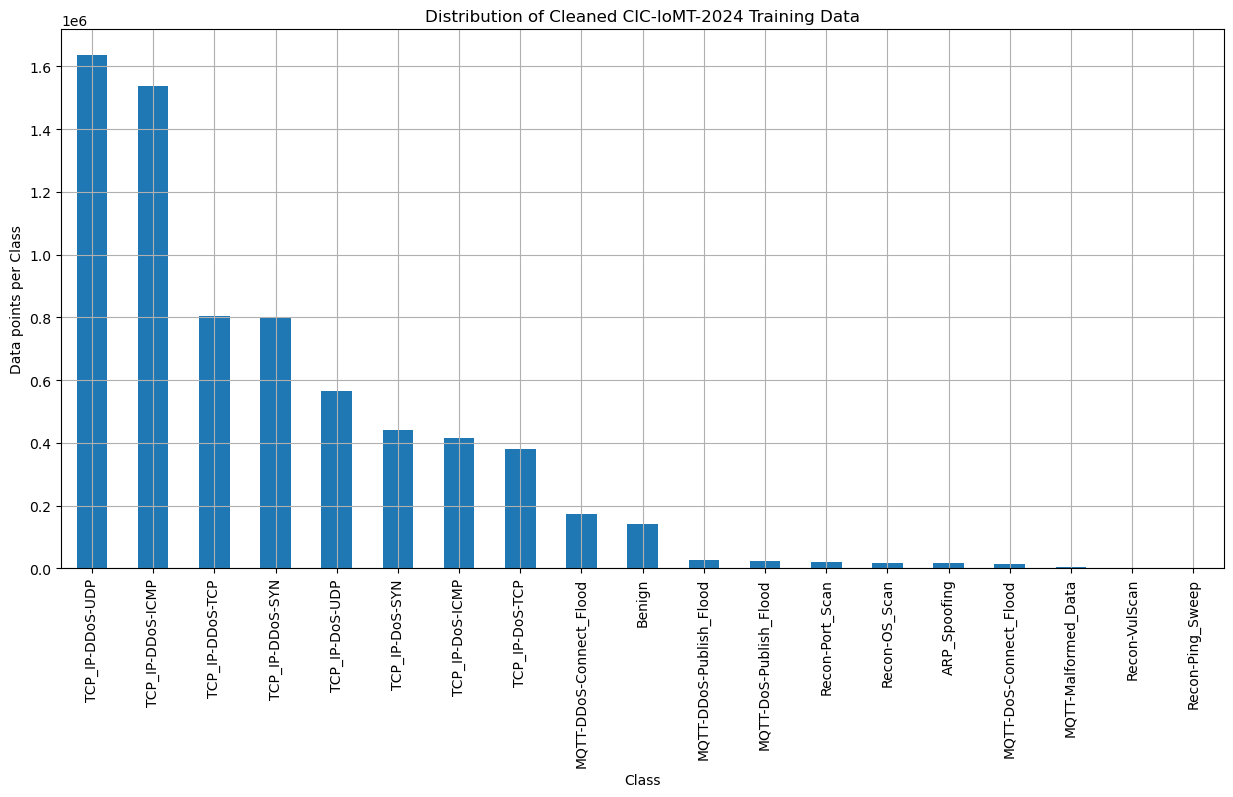

In [19]:
plt.figure(figsize=(15,7))
class_distribution = data_clean['Label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of Cleaned CIC-IoMT-2024 Training Data')
plt.grid()
plt.show()

In [20]:
# After Cleaning Data set for Duplicate
sorted_ds = np.argsort(-class_distribution.values)
for i in sorted_ds:
    print('Number of data points in class', class_distribution.index[i],':', class_distribution.values[i], 
          '(', np.round((class_distribution.values[i]/data_clean.shape[0]*100), 3), '%)')

Number of data points in class TCP_IP-DDoS-UDP : 1635956 ( 23.288 %)
Number of data points in class TCP_IP-DDoS-ICMP : 1537476 ( 21.886 %)
Number of data points in class TCP_IP-DDoS-TCP : 804465 ( 11.452 %)
Number of data points in class TCP_IP-DDoS-SYN : 801962 ( 11.416 %)
Number of data points in class TCP_IP-DoS-UDP : 566950 ( 8.07 %)
Number of data points in class TCP_IP-DoS-SYN : 441903 ( 6.29 %)
Number of data points in class TCP_IP-DoS-ICMP : 416292 ( 5.926 %)
Number of data points in class TCP_IP-DoS-TCP : 380384 ( 5.415 %)
Number of data points in class MQTT-DDoS-Connect_Flood : 173036 ( 2.463 %)
Number of data points in class Benign : 140382 ( 1.998 %)
Number of data points in class MQTT-DDoS-Publish_Flood : 27623 ( 0.393 %)
Number of data points in class MQTT-DoS-Publish_Flood : 23397 ( 0.333 %)
Number of data points in class Recon-Port_Scan : 21447 ( 0.305 %)
Number of data points in class Recon-OS_Scan : 16832 ( 0.24 %)
Number of data points in class ARP_Spoofing : 16047 (

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder



#drop na values and reset index
data_clean = data_clean.dropna().reset_index()

# label encoding
labelencoder = LabelEncoder()
data_clean['Label'] = labelencoder.fit_transform(data_clean['Label'])

data_clean['Label'].value_counts()

14    1635956
11    1537476
13     804465
12     801962
18     566950
16     441903
15     416292
17     380384
2      173036
1      140382
3       27623
5       23397
9       21447
7       16832
0       16047
4       12773
6        5130
10       2173
8         740
Name: Label, dtype: int64

In [22]:
print(data_clean.shape)

(7024968, 48)


In [23]:
# Convert to numpy array
data_np = data_clean.to_numpy(dtype="float32")

# Drop rows with infinity (inf) values
data_np = data_np[~np.isinf(data_np).any(axis=1)]


# Separate features (X) and target (Y)
X = data_np[:, :-1]  # All columns except the last one
enc = OneHotEncoder()
Y = enc.fit_transform(data_np[:, -1:]).toarray()  # One-hot encode the last column (target)

In [24]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=20, shuffle=True)

# Reshape input features for CNN
_features = X_train.shape[1]  # Number of features
n_classes = Y.shape[1]  # Number of classes in the target
X_train = X_train.reshape(X_train.shape[0], _features, 1)
X_test = X_test.reshape(X_test.shape[0], _features, 1)

_features = X.shape[1]
n_classes = Y.shape[1]

print('X.shape = ',X.shape)
print('Y.shape = ',Y.shape)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ', Y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ',Y_test.shape)

X.shape =  (7024968, 47)
Y.shape =  (7024968, 19)
X_train.shape =  (5268726, 47, 1)
y_train.shape =  (5268726, 19)
X_test.shape =  (1756242, 47, 1)
y_test.shape =  (1756242, 19)


In [25]:
data = df.iloc[:,1:-1]

In [26]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data.iloc[:,0] = label_encoder.fit_transform(data.iloc[:,0]).astype('float64')

In [27]:
corr = data.corr()

<AxesSubplot:>

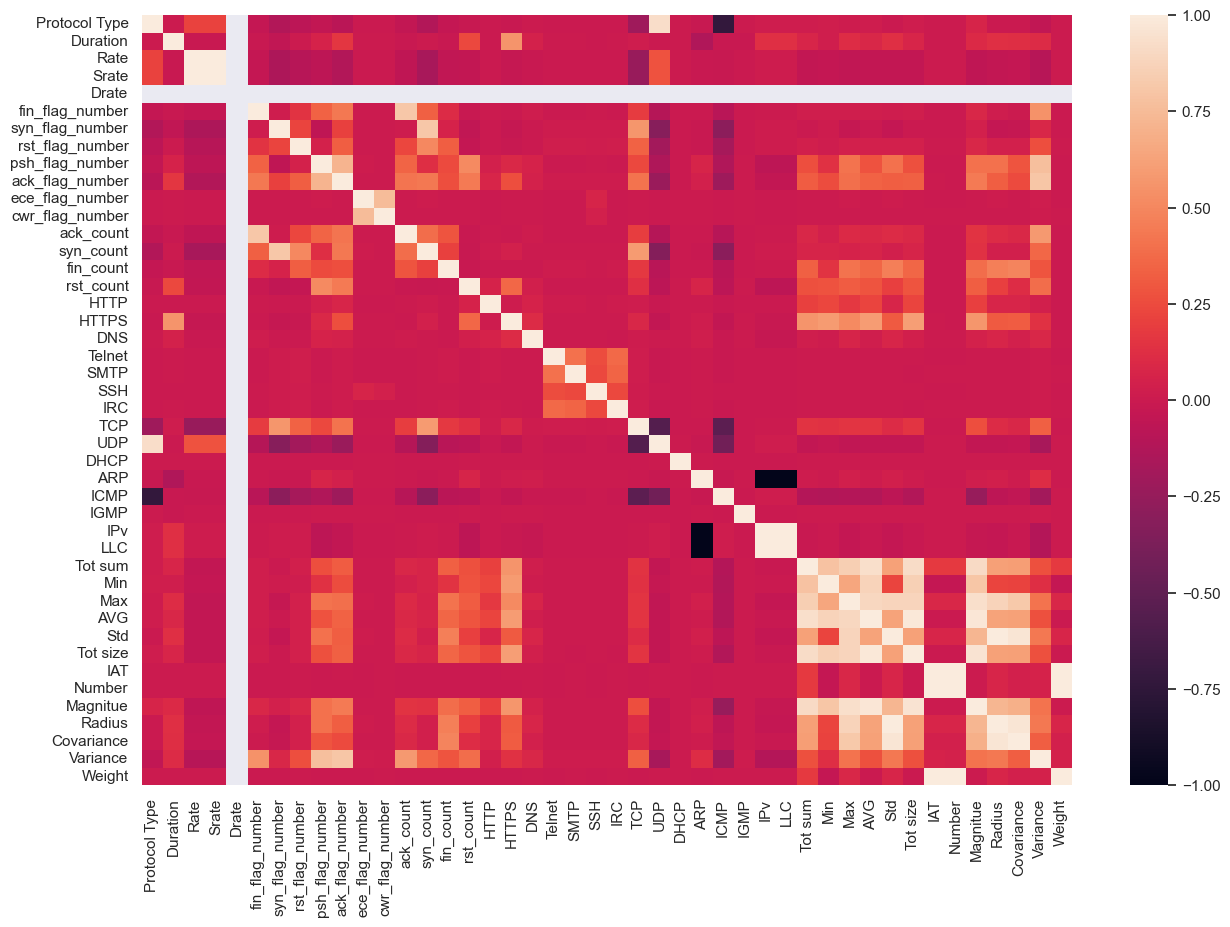

In [28]:
import seaborn as sns

sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corr)

# IO-DCNN

In [29]:
from keras.models import Sequential
from keras import callbacks
from keras.layers import Dense, Activation, Flatten, Convolution1D, Dropout, MaxPooling1D
from sklearn import metrics
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
from hyperopt.plotting import main_plot_history, main_plot_vars
import uuid
import gc
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

K = keras.backend

X_train = X_train.reshape(X_train.shape[0], _features, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], _features, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, activation='relu', input_shape=(_features, 1)))
model.add(Convolution1D(filters=96, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Convolution1D(filters=64, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Flatten())

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, activation='softmax'))

model.summary() 

opt = keras.optimizers.Adam(learning_rate=lr)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])
     
   
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=10,
                              verbose=True, 
                              validation_data=(X_test, Y_test))  

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 42, 128)           896       
                                                                 
 conv1d_1 (Conv1D)           (None, 37, 96)            73824     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 37, 96)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 32, 64)            36928     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 32, 64)           0         
 1D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [30]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')

54883/54883 [==============================] - 73s 1ms/step
Best loss: 0.00917003583163023
Balanced Acc loss: 87.0004393167458
Learning Rate - 
0.001


In [32]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()


escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

inference_time = end_time - start_time
# Given data
validation_time_total = inference_time  # Total validation time in seconds
validation_samples = X_test.shape  # Number of validation samples
batch_size = 128  # Batch size

# Calculate the number of batches
#num_batches = np.ceil(validation_samples / batch_size)
num_batches = np.ceil(validation_samples[0] / batch_size)

# Calculate time per batch during inference
time_per_batch = validation_time_total / num_batches

# Calculate detection time per sample
detection_time_per_sample = time_per_batch / batch_size

# Print results
print(f"Number of Batches: {num_batches}")
print(f"Time per Batch (Inference): {time_per_batch:.6f} seconds")
print(f"Detection Time per Sample: {detection_time_per_sample:.6f} seconds")



print("Time for fitting: {:.2f} seconds".format(inference_time))

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

54883/54883 [==============================] - 79s 1ms/step
Completed
Time taken: 0:03:40.235608
Number of Batches: 13721.0
Time per Batch (Inference): 0.006844 seconds
Detection Time per Sample: 0.000053 seconds
Time for fitting: 93.91 seconds
Validation score: 0.9955268123641275
Evaluation score: [0.01038625929504633, 0.9955267906188965]
Recall score: 0.9955268123641275
Precision score: 0.9959913413868828
F1 Measure score: 0.9954461783585321
ROC-AUC score: 0.9348825667235025


In [33]:
# Plot for training and validation loss
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

In [34]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

54883/54883 [==============================] - 78s 1ms/step


In [35]:
pred.shape
y_test.shape

(1756242,)

In [36]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[  2136,   1338,      0,      0,      0,      0,    477,      1,
            63,      0,      0,      0,      0,      0,      1,      0,
             0,      0,      0],
       [   128,  34609,      0,      0,      0,      0,    354,     11,
            43,      0,      2,      0,      0,      0,      0,      0,
             0,      0,      0],
       [     0,      3,  43471,      2,      1,      0,      0,      1,
             0,      0,      0,      0,      0,      1,      0,      0,
             0,      0,      0],
       [     0,      0,     16,   6954,     15,      8,      1,      1,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [     0,      0,    242,     12,   2946,      2,      0,      0,
             0,      2,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [     0,      0,      0,      0,      0,   5789,      1,      0,
             0,      0,      0,      0,    

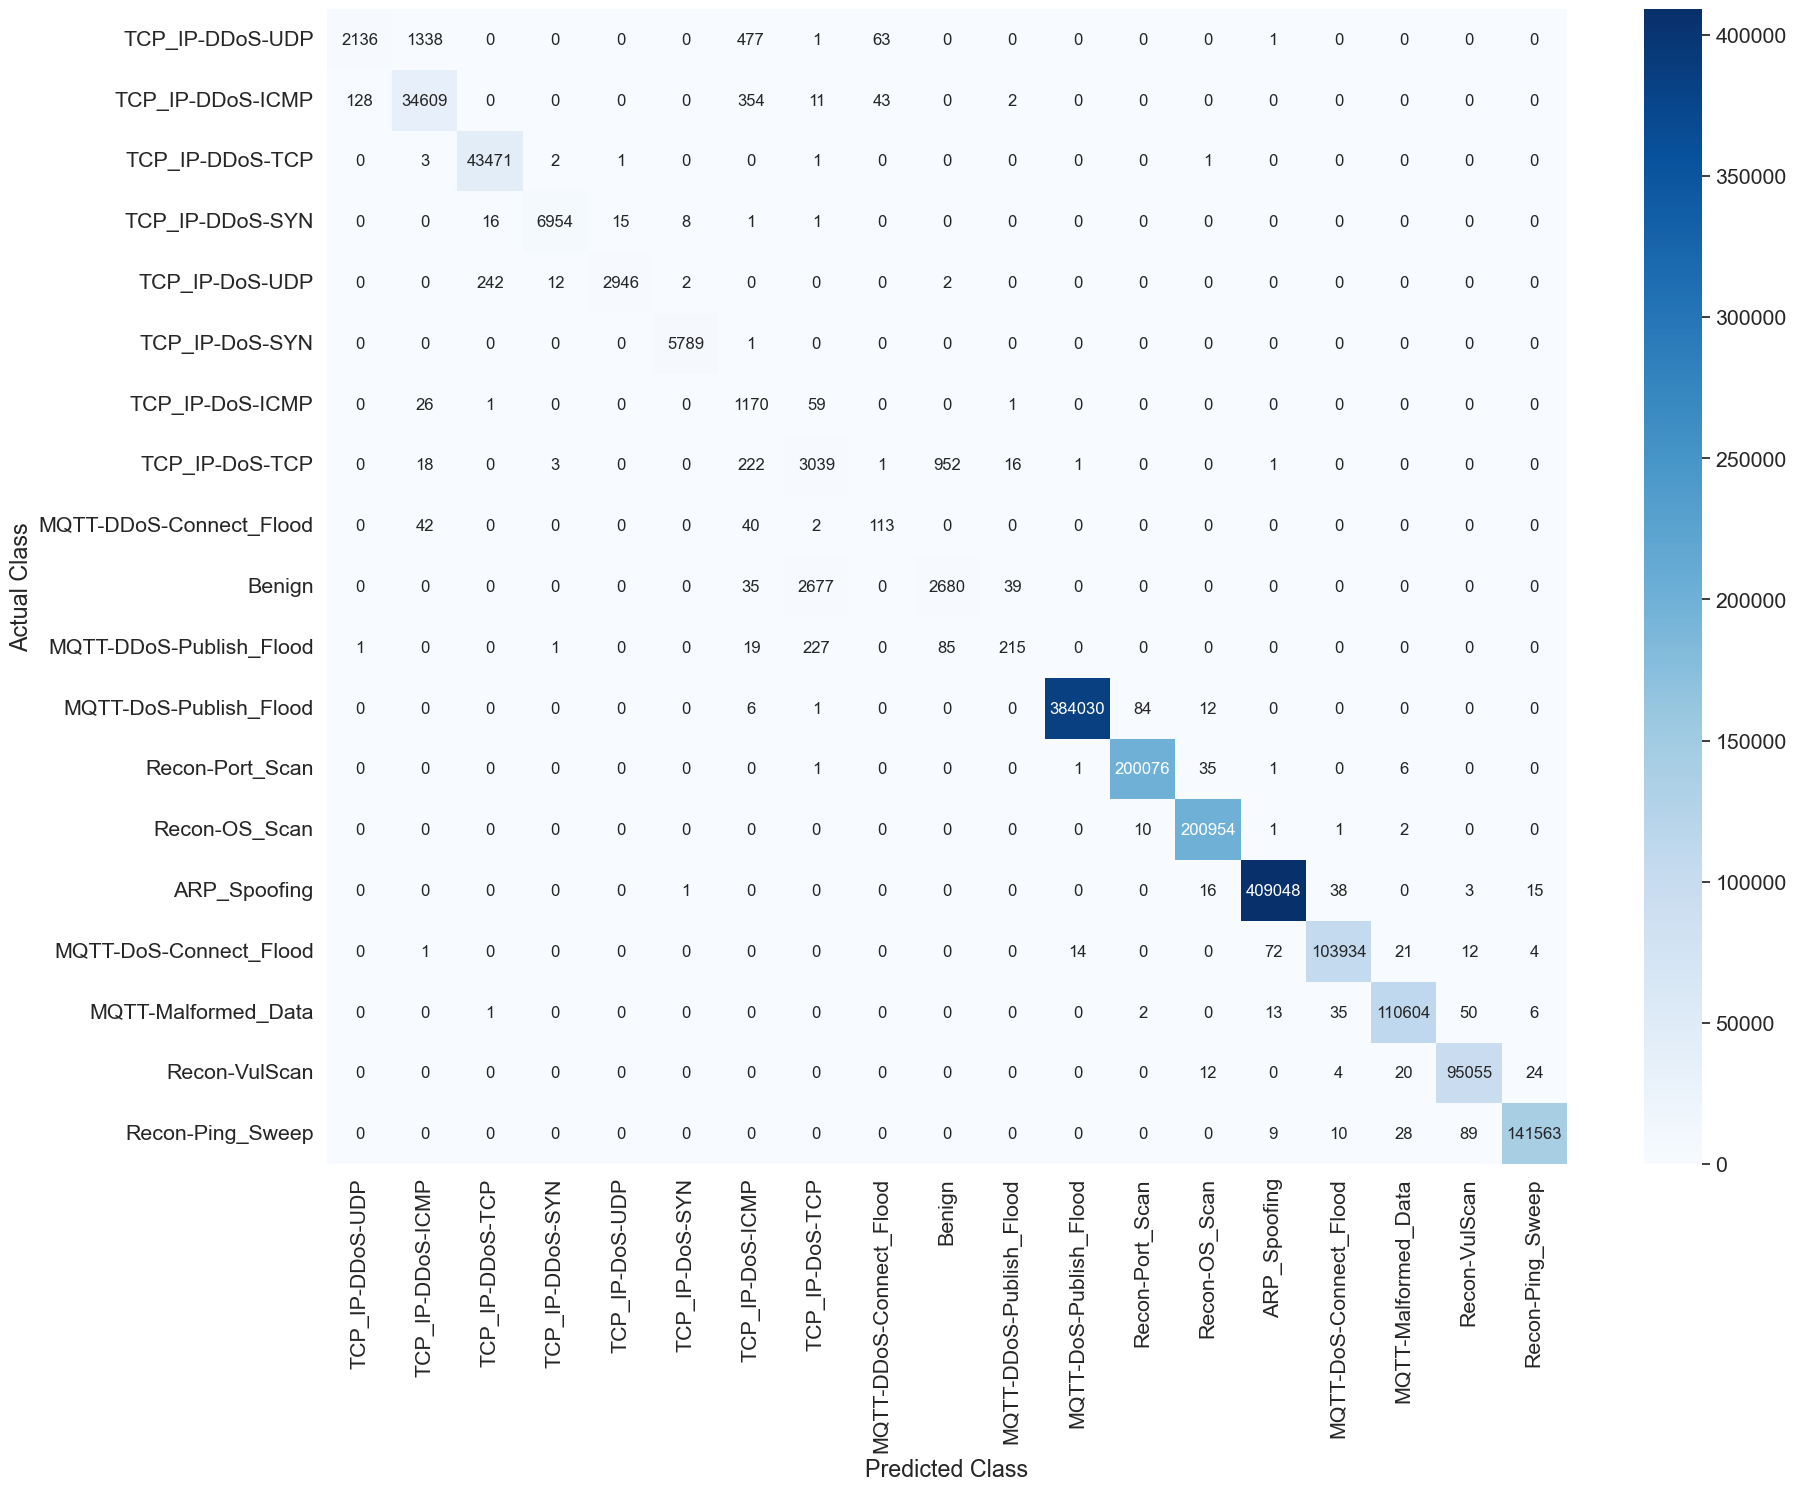

In [37]:
cf_matrix = confusion_matrix(y_test, pred)
cm_df = pd.DataFrame(cf_matrix)

labels = ['TCP_IP-DDoS-UDP','TCP_IP-DDoS-ICMP','TCP_IP-DDoS-TCP','TCP_IP-DDoS-SYN','TCP_IP-DoS-UDP','TCP_IP-DoS-SYN',
          'TCP_IP-DoS-ICMP','TCP_IP-DoS-TCP','MQTT-DDoS-Connect_Flood','Benign','MQTT-DDoS-Publish_Flood',
          'MQTT-DoS-Publish_Flood','Recon-Port_Scan','Recon-OS_Scan','ARP_Spoofing','MQTT-DoS-Connect_Flood',
          'MQTT-Malformed_Data','Recon-VulScan','Recon-Ping_Sweep']

plt.figure(figsize=(20,15))
sn.set(font_scale=1.4)
sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels, cmap='Blues')

#sn.heatmap(cm_df, annot=True, annot_kws={"size":12}, fmt='g', xticklabels=labels, yticklabels=labels)
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
    
plt.show() 

# IO-DCNN - Adagrad

In [38]:
K = keras.backend

X_train = X_train.reshape(X_train.shape[0], _features, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], _features, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, activation='relu', input_shape=(_features, 1)))
model.add(Convolution1D(filters=96, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Convolution1D(filters=64, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Flatten())

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, activation='softmax'))

model.summary() 

opt = keras.optimizers.Adagrad(learning_rate=lr)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

   
   
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=10,
                              verbose=True, 
                              validation_data=(X_test, Y_test))  

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_3 (Conv1D)           (None, 42, 128)           896       
                                                                 
 conv1d_4 (Conv1D)           (None, 37, 96)            73824     
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 37, 96)           0         
 1D)                                                             
                                                                 
 conv1d_5 (Conv1D)           (None, 32, 64)            36928     
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 32, 64)           0         
 1D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 2048)             

In [39]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')

54883/54883 [==============================] - 79s 1ms/step
Best loss: 0.014846196398139
Balanced Acc loss: 81.20370315944277
Learning Rate - 
0.001


In [40]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()


escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

inference_time = end_time - start_time
# Given data
validation_time_total = inference_time  # Total validation time in seconds
validation_samples = X_test.shape  # Number of validation samples
batch_size = 128  # Batch size

# Calculate the number of batches
num_batches = np.ceil(validation_samples[0] / batch_size)

# Calculate time per batch during inference
time_per_batch = validation_time_total / num_batches

# Calculate detection time per sample
detection_time_per_sample = time_per_batch / batch_size

# Print results
print(f"Number of Batches: {num_batches}")
print(f"Time per Batch (Inference): {time_per_batch:.6f} seconds")
print(f"Detection Time per Sample: {detection_time_per_sample:.6f} seconds")



print("Time for fitting: {:.2f} seconds".format(inference_time))

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

54883/54883 [==============================] - 77s 1ms/step
Completed
Time taken: 0:03:46.354231
Number of Batches: 13721.0
Time per Batch (Inference): 0.006733 seconds
Detection Time per Sample: 0.000053 seconds
Time for fitting: 92.38 seconds
Validation score: 0.9946408296806477
Evaluation score: [0.014845680445432663, 0.9946408271789551]
Recall score: 0.9946408296806477
Precision score: 0.9944402414573605
F1 Measure score: 0.9938470792120562
ROC-AUC score: 0.9058744505812775


In [41]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

54883/54883 [==============================] - 77s 1ms/step


In [42]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[  2031,   1854,      0,      0,      0,      0,     74,      1,
            51,      0,      4,      0,      0,      0,      1,      0,
             0,      0,      0],
       [   369,  34634,      0,      1,      0,      0,     83,     12,
            38,      1,      1,      0,      0,      0,      8,      0,
             0,      0,      0],
       [     0,      0,  43366,      0,     70,      0,      0,      1,
             0,      0,      0,      0,     42,      0,      0,      0,
             0,      0,      0],
       [     0,      0,     20,   6895,     33,     42,      0,      0,
             0,      0,      0,      0,      5,      0,      0,      0,
             0,      0,      0],
       [     0,      0,    405,      0,   2789,      4,      0,      0,
             0,      0,      0,      0,      6,      0,      0,      0,
             0,      0,      0],
       [     0,      1,      0,      5,      0,   5781,      0,      0,
             0,      0,      0,      0,    

# IO-DCNN - Adamax

In [43]:
K = keras.backend

X_train = X_train.reshape(X_train.shape[0], _features, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], _features, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, activation='relu', input_shape=(_features, 1)))
model.add(Convolution1D(filters=96, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Convolution1D(filters=64, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Flatten())

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, activation='softmax'))

model.summary() 

opt = keras.optimizers.Adamax(learning_rate=lr)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

   
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=10,
                              verbose=True, 
                              validation_data=(X_test, Y_test))  

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 42, 128)           896       
                                                                 
 conv1d_7 (Conv1D)           (None, 37, 96)            73824     
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 37, 96)           0         
 1D)                                                             
                                                                 
 conv1d_8 (Conv1D)           (None, 32, 64)            36928     
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 32, 64)           0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 2048)             

In [44]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')

54883/54883 [==============================] - 83s 2ms/step
Best loss: 0.006774603389203548
Balanced Acc loss: 91.00091327764851
Learning Rate - 
0.001


In [45]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()


escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

inference_time = end_time - start_time
# Given data
validation_time_total = inference_time  # Total validation time in seconds
validation_samples = X_test.shape  # Number of validation samples
batch_size = 128  # Batch size

# Calculate the number of batches
num_batches = np.ceil(validation_samples[0] / batch_size)

# Calculate time per batch during inference
time_per_batch = validation_time_total / num_batches

# Calculate detection time per sample
detection_time_per_sample = time_per_batch / batch_size

# Print results
print(f"Number of Batches: {num_batches}")
print(f"Time per Batch (Inference): {time_per_batch:.6f} seconds")
print(f"Detection Time per Sample: {detection_time_per_sample:.6f} seconds")



print("Time for fitting: {:.2f} seconds".format(inference_time))

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

54883/54883 [==============================] - 84s 2ms/step
Completed
Time taken: 0:04:03.493331
Number of Batches: 13721.0
Time per Batch (Inference): 0.007212 seconds
Detection Time per Sample: 0.000056 seconds
Time for fitting: 98.96 seconds
Validation score: 0.9970043991659464
Evaluation score: [0.006774538662284613, 0.9970043897628784]
Recall score: 0.9970043991659464
Precision score: 0.9973243753775751
F1 Measure score: 0.9967521043050115
ROC-AUC score: 0.9549250646010662


In [46]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

54883/54883 [==============================] - 83s 2ms/step


In [47]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[  3482,    534,      0,      0,      0,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [   837,  34302,      1,      0,      0,      0,      1,      5,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      1],
       [     0,      1,  43440,      0,     38,      0,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [     0,      0,      6,   6977,      5,      5,      1,      1,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [     0,      0,    118,      0,   3084,      2,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [     0,      0,      0,      3,      0,   5785,      0,      1,
             0,      0,      0,      1,    

# IO-DCNN - Nadam

In [48]:
K = keras.backend

X_train = X_train.reshape(X_train.shape[0], _features, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], _features, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, activation='relu', input_shape=(_features, 1)))
model.add(Convolution1D(filters=96, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Convolution1D(filters=64, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Flatten())

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, activation='softmax'))

model.summary() 

opt = keras.optimizers.Nadam(learning_rate=lr)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

   
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=10,
                              verbose=True, 
                              validation_data=(X_test, Y_test))  

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_9 (Conv1D)           (None, 42, 128)           896       
                                                                 
 conv1d_10 (Conv1D)          (None, 37, 96)            73824     
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 37, 96)           0         
 1D)                                                             
                                                                 
 conv1d_11 (Conv1D)          (None, 32, 64)            36928     
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 32, 64)           0         
 1D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 2048)             

In [49]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')

54883/54883 [==============================] - 82s 1ms/step
Best loss: 0.009256347082555294
Balanced Acc loss: 87.82613396187135
Learning Rate - 
0.001


In [50]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()


escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

inference_time = end_time - start_time
# Given data
validation_time_total = inference_time  # Total validation time in seconds
validation_samples = X_test.shape  # Number of validation samples
batch_size = 128  # Batch size

# Calculate the number of batches
num_batches = np.ceil(validation_samples[0] / batch_size)

# Calculate time per batch during inference
time_per_batch = validation_time_total / num_batches

# Calculate detection time per sample
detection_time_per_sample = time_per_batch / batch_size

# Print results
print(f"Number of Batches: {num_batches}")
print(f"Time per Batch (Inference): {time_per_batch:.6f} seconds")
print(f"Detection Time per Sample: {detection_time_per_sample:.6f} seconds")



print("Time for fitting: {:.2f} seconds".format(inference_time))

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

54883/54883 [==============================] - 83s 2ms/step
Completed
Time taken: 0:04:05.684132
Number of Batches: 13721.0
Time per Batch (Inference): 0.007153 seconds
Detection Time per Sample: 0.000056 seconds
Time for fitting: 98.15 seconds
Validation score: 0.9961332208203653
Evaluation score: [0.009722694754600525, 0.9961332082748413]
Recall score: 0.9961332208203653
Precision score: 0.9964405355641346
F1 Measure score: 0.9958140270029026
ROC-AUC score: 0.9390269744399141


In [51]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

54883/54883 [==============================] - 84s 2ms/step


In [52]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[  3254,    686,      0,      0,      0,      0,      6,      0,
            69,      0,      0,      0,      0,      0,      1,      0,
             0,      0,      0],
       [  1065,  33993,      2,      0,      0,      0,     21,      8,
            55,      1,      0,      0,      0,      1,      1,      0,
             0,      0,      0],
       [     0,      2,  43435,     23,     11,      0,      0,      0,
             0,      1,      0,      0,      3,      4,      0,      0,
             0,      0,      0],
       [     0,      1,     10,   6940,      1,     39,      3,      0,
             0,      0,      0,      1,      0,      0,      0,      0,
             0,      0,      0],
       [     0,      0,    137,      5,   3059,      3,      0,      0,
             0,      0,      0,      0,      0,      0,      0,      0,
             0,      0,      0],
       [     0,      0,      0,      0,      0,   5786,      2,      2,
             0,      0,      0,      0,    

# IO-DCNN - SGD

In [54]:
K = keras.backend

X_train = X_train.reshape(X_train.shape[0], _features, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], _features, 1).astype('float32')


# CNN Model
model = Sequential()
model.add(Convolution1D(filters=128, kernel_size=6, activation='relu', input_shape=(_features, 1)))
model.add(Convolution1D(filters=96, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Convolution1D(filters=64, kernel_size=6, activation='relu'))

model.add(MaxPooling1D(pool_size=2, strides=1, padding='same'))

model.add(Flatten())

model.add(Dense(96, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(n_classes, activation='softmax'))

model.summary() 

opt = keras.optimizers.SGD(learning_rate=lr)
model.compile(loss='categorical_crossentropy',optimizer=opt, metrics=['accuracy'])

   
   
history = model.fit(X_train, Y_train,
                              batch_size=128,
                              epochs=10,
                              verbose=True, 
                              validation_data=(X_test, Y_test)) 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 42, 128)           896       
                                                                 
 conv1d_16 (Conv1D)          (None, 37, 96)            73824     
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 37, 96)           0         
 g1D)                                                            
                                                                 
 conv1d_17 (Conv1D)          (None, 32, 64)            36928     
                                                                 
 max_pooling1d_11 (MaxPoolin  (None, 32, 64)           0         
 g1D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 2048)             

In [55]:
#y_pred = model.predict_classes(X_test)
y_pred = np.argmax(model.predict(X_test), axis=-1)
balanced_score = metrics.balanced_accuracy_score(np.argmax(Y_test, axis=1), y_pred) * 100
    
best_loss = np.amin(history.history['val_loss']) 
print('Best loss: {}'.format(best_loss))
print('Balanced Acc loss: {}'.format(balanced_score))
    
    
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr)) 
print('==================================')

54883/54883 [==============================] - 83s 2ms/step
Best loss: 0.015469212085008621
Balanced Acc loss: 78.8675092781183
Learning Rate - 
0.001


In [56]:
import datetime as dt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
from sklearn import preprocessing
import time

start = dt.datetime.now()


escore = model.evaluate(X_test, Y_test, batch_size=32)

# Measure inference time
start_time = time.time()
pred = model.predict(X_test)
end_time = time.time()


pred = np.argmax(pred,axis=1)
y_eval = np.argmax(Y_test,axis=1)

score = metrics.accuracy_score(y_eval, pred)
rscore = recall_score(y_eval, pred, average='weighted')
ascore = precision_score(y_eval, pred, average='weighted')
f1score= f1_score(y_eval, pred, average='weighted') #F1 = 2 * (precision * recall) / (precision + recall) for manual

lb = preprocessing.LabelBinarizer()
lb.fit(y_eval)
y_eval = lb.transform(y_eval)
pred = lb.transform(pred)
roc_score = roc_auc_score(y_eval, pred)

print('Completed')
print('Time taken:',dt.datetime.now()-start)

inference_time = end_time - start_time
# Given data
validation_time_total = inference_time  # Total validation time in seconds
validation_samples = X_test.shape  # Number of validation samples
batch_size = 128  # Batch size

# Calculate the number of batches
num_batches = np.ceil(validation_samples[0] / batch_size)

# Calculate time per batch during inference
time_per_batch = validation_time_total / num_batches

# Calculate detection time per sample
detection_time_per_sample = time_per_batch / batch_size

# Print results
print(f"Number of Batches: {num_batches}")
print(f"Time per Batch (Inference): {time_per_batch:.6f} seconds")
print(f"Detection Time per Sample: {detection_time_per_sample:.6f} seconds")



print("Time for fitting: {:.2f} seconds".format(inference_time))

print("Validation score: {}".format(score))
print("Evaluation score: {}".format(escore))
print("Recall score: {}".format(rscore))
print("Precision score: {}".format(ascore))
print("F1 Measure score: {}".format(f1score))
print("ROC-AUC score: {}".format(roc_score))

54883/54883 [==============================] - 84s 2ms/step


C:\Users\Maruata\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Completed
Time taken: 0:04:04.852663
Number of Batches: 13721.0
Time per Batch (Inference): 0.007254 seconds
Detection Time per Sample: 0.000057 seconds
Time for fitting: 99.54 seconds
Validation score: 0.994459191842582
Evaluation score: [0.015468908473849297, 0.9944592118263245]
Recall score: 0.994459191842582
Precision score: 0.9940924204153239
F1 Measure score: 0.9937057910062115
ROC-AUC score: 0.8941885472098587


In [57]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test = Y_test.argmax(axis=1)

54883/54883 [==============================] - 83s 2ms/step


In [58]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
import seaborn as sn

confMat = confusion_matrix(y_test, pred)
confMat

array([[  2418,   1472,      0,      0,      0,      0,    124,      0,
             0,      0,      0,      0,      0,      0,      1,      0,
             0,      0,      1],
       [   685,  34283,      1,      0,      0,      0,    154,      5,
             0,      0,      0,      0,      3,      0,      9,      0,
             0,      0,      7],
       [     0,      0,  43326,      1,     92,      2,      0,      1,
             0,      0,      0,      0,     57,      0,      0,      0,
             0,      0,      0],
       [     0,      0,     17,   6904,     21,     48,      0,      0,
             0,      0,      0,      0,      5,      0,      0,      0,
             0,      0,      0],
       [     0,      0,    340,      0,   2852,      3,      0,      0,
             0,      0,      0,      1,      8,      0,      0,      0,
             0,      0,      0],
       [     0,      1,      0,      8,      3,   5775,      0,      0,
             0,      0,      0,      0,    